# Simple Linear Regression with Tensorflow

In this lab we will practice running a simple linear regression model with Tensorflow.  This will allow us to get familiar with the tensors or components that are involved using tensorflow.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
print(tf.__version__)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.1


## Here we will generate and plot some random data and add some noise


#### It is quite obvious from the graph that we have some sort of linear function that will define our data 

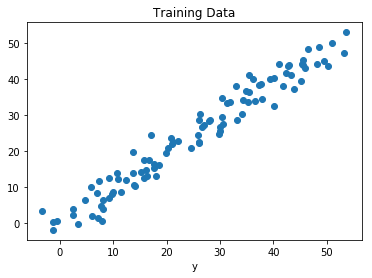

In [3]:
#generate some data with noise
np.random.seed(52) 
tf.set_random_seed(52) 

# Genrating random linear data 
# There will be 100 data points ranging from 0 to 50 
x = np.linspace(0, 50, 100) 
y = np.linspace(0, 50, 100) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 100) 
y += np.random.uniform(-4, 4, 100) 
  
n = len(x) # Number of data points 

# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show()

## Next we define two placeholder and some variables

These placeholders will be are a promise to provide a value later.  We will feed our data into this model using placeholders. 

The variables will be the weights and bias that we will be solving for.


In [5]:
#defining the placeholders X and Y, 
#so that we can feed our training examples X and Y into the optimizer during the training process.
X = tf.placeholder("float") 
Y = tf.placeholder("float")

#defining the weight and bias
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

Instructions for updating:
Colocations handled automatically by placer.


## Here we define our model or graph.

The hypothesis is a simple linear model

The cost function is the mean squared error between the prediction and the actual y values.

We use the gradient descent optimizer to minimize our cost function or the error between our predicted and actual y values.

In [6]:


#hyper parameters for learning  rate and number of times we 
learning_rate = 0.01
training_epochs = 1000

# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 




Instructions for updating:
Use tf.cast instead.


## Here we train our model

Remember that tensorf flow feeds matrices into the graph using the session.  We run the optimizer in the first session which starts a chain reaction of sorts as it needs the cost function and the cost function needs the hypothesis and the X and Y values that we feed in through the dictionary.

With each epoch we should see the cost function converge by getting smaller and smaller.

In [11]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 
    #writes to tensorboard
    file_writer = tf.summary.FileWriter("/Users/Shaun/tensor_output", sess.graph)
    #tensorboard --logdir=/Users/Shaun/tensor_output

Epoch 50 : cost = 5.05782 W = 0.9641849 b = -0.43970925
Epoch 100 : cost = 5.019143 W = 0.96174675 b = -0.31761327
Epoch 150 : cost = 4.9886384 W = 0.95955753 b = -0.20798339
Epoch 200 : cost = 4.9646497 W = 0.9575919 b = -0.10954659
Epoch 250 : cost = 4.9458537 W = 0.95582694 b = -0.021160781
Epoch 300 : cost = 4.931189 W = 0.9542422 b = 0.058200393
Epoch 350 : cost = 4.9198055 W = 0.95281935 b = 0.12945835
Epoch 400 : cost = 4.9110227 W = 0.95154166 b = 0.19344051
Epoch 450 : cost = 4.904296 W = 0.95039445 b = 0.25088996
Epoch 500 : cost = 4.899189 W = 0.9493644 b = 0.3024747
Epoch 550 : cost = 4.895359 W = 0.9484395 b = 0.34879136
Epoch 600 : cost = 4.892527 W = 0.94760907 b = 0.39037803
Epoch 650 : cost = 4.8904743 W = 0.94686335 b = 0.4277197
Epoch 700 : cost = 4.8890247 W = 0.9461938 b = 0.46124864
Epoch 750 : cost = 4.8880415 W = 0.9455927 b = 0.49135473
Epoch 800 : cost = 4.8874164 W = 0.94505286 b = 0.51838756
Epoch 850 : cost = 4.887061 W = 0.9445682 b = 0.5426581
Epoch 900 :

## Make predictions with our model

Now that we have our weights and bias we have a model that can be used to make predictions given any new data.  We plot the regression line to see how our predictions look with actual data.

What do you think?

In [9]:
# Calculating the predictions based on the weights and bias from out algorithm
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

Training cost = 4.887014 Weight = 0.94339144 bias = 0.6015903 



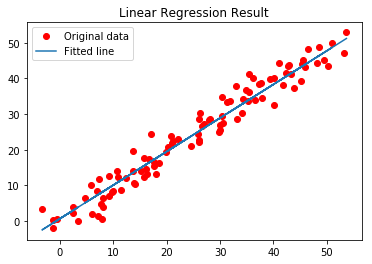

In [10]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 